# Caso: Mercado inmobiliario

## 1) Entender el enunciado del problema y el caso práctico.

Dentro de la sociedad globalizada e industrializada, es sabido que los precios de los inmuebles han presentado un constante cambio, por lo que quienes deseen invertir o vender una propiedad se enfrentan al fenómeno especulativo existente en la valorización de éstos. Esto, debido a la constante tendencia de las ciudades a crecer demográfica y comercialmente, llegando a un punto en donde no se tiene certeza de la valorización real dentro del sector en donde se desee invertir. Pese a que el precio depende, en cierta medida, de las tendencias que esté teniendo el mercado inmobiliario en un determinado tiempo, poder estimar adecuadamente el valor de una propiedad es una referencia clave para entender si es una buena oportunidad, ya sea de compra o de venta.

### Objetivo a tener en cuenta.

Usted ha sido contactado de una importante empresa inversora dentro del rubro de la inmobiliaria en Colombia, con el fin de que implemente un modelo de clasificación que permita clasificar el precio de las propiedades en venta, utilizando los datos que se han puesto a su disposición correspondientes al año 2020. Para esto, específicamente, debe predecir la categorización de las propiedades entre baratas o caras, considerando como criterio el valor promedio de los precios (la media). 

## 2) Tratamiento del dataset

### a) Importar las librerias

In [66]:
import pandas as pd
import numpy as np
import time 
import seaborn as sns
import matplotlib.pyplot as plt

print('Librerias importadas !')

Librerias importadas !


### b) Visualización del dataset

#### Creación de DataFrame

In [67]:
# Extraemos los datos del dataset
data = pd.read_csv('properties_colombia_train.csv')
print('DataFrame cargado !!!')

DataFrame cargado !!!


#### Estadísticos

In [68]:
# Resumen global de estadisticos:
data.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,197549.000000,148051.000000,148051.000000,27537.000000,40525.000000,156467.000000,6974.000000,9.802000e+03,1.974860e+05
mean,497437.843851,5.666001,-75.041045,3.291208,3.239062,2.639279,1352.132349,9.483356e+02,6.436051e+08
std,290023.578338,2.196804,1.104575,1.754795,1.985636,1.437174,7713.769352,3.730875e+04,1.944868e+09
min,0.000000,-32.787342,-119.698190,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,234211.000000,4.582315,-75.645126,3.000000,3.000000,2.000000,72.000000,7.100000e+01,2.000000e+08
50%,507385.000000,4.908611,-75.476654,3.000000,3.000000,2.000000,120.000000,1.140000e+02,3.300000e+08
75%,770037.000000,6.248101,-74.094001,4.000000,4.000000,3.000000,281.000000,2.160000e+02,6.000000e+08
max,993551.000000,34.420334,-67.482570,40.000000,96.000000,20.000000,180000.000000,3.480000e+06,3.450000e+11


#### Transformación de la columna 'price': 0,1

Como se nos pide clasificar las propiedades en barata (0) y cara (1) tomando como referencia la media, lo primero que haremos será cambiar a binario la columna 'price'

In [69]:
media = data['price'].mean()
data['price'] = data['price'].apply(lambda x: 1 if x > media else 0)

#### Variables que posee el dataset

In [70]:
# Vemos las columnas que tiene el dataset
data.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type', 'geometry'],
      dtype='object')

#### Número de renglones y columas

In [71]:
# Su numero de filas y columnas
data.shape

(197549, 27)

#### Tipo de variable

In [72]:
# Tipo de variable que tenemos
data.dtypes

Unnamed: 0           int64
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
l4                  object
l5                  object
l6                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price                int64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
geometry            object
dtype: object

#### Valores nulos

In [73]:
lista = data.isnull().sum().tolist()
nom = data.columns.tolist()
nom
dict_from_list = dict(zip(nom, lista))
for clave, valor in dict_from_list.items():
    print(f'{clave}: {valor}')

Unnamed: 0: 0
id: 0
ad_type: 0
start_date: 0
end_date: 0
created_on: 0
lat: 49498
lon: 49498
l1: 0
l2: 0
l3: 11032
l4: 152182
l5: 170140
l6: 190682
rooms: 170012
bedrooms: 157024
bathrooms: 41082
surface_total: 190575
surface_covered: 187747
price: 0
currency: 67
price_period: 161578
title: 1
description: 121
property_type: 0
operation_type: 0
geometry: 0


#### Visualización más detallada del DataFrame

In [74]:
# Columnas: 'Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon','l1', 'l2', 'l3', 'l4', 'l5', 'l6'
data[['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon','l1', 'l2', 'l3', 'l4', 'l5', 'l6']].head(5)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,Medellín,El Poblado,NaN,NaN
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,Bucaramanga,NaN,NaN,NaN
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,Medellín,NaN,NaN,NaN


In [75]:
# Columnas: 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency','price_period', 'title', 'description'
data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency','price_period', 'title', 'description']].head(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description
0,NaN,4.0,4.0,NaN,NaN,1,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...
1,NaN,3.0,2.0,NaN,NaN,0,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...
2,NaN,NaN,2.0,NaN,NaN,0,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...
3,NaN,NaN,1.0,NaN,NaN,1,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...
4,NaN,NaN,2.0,NaN,NaN,0,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...


In [76]:
# Columnas: 
data[['property_type','operation_type', 'geometry']].head()

,property_type,operation_type,geometry
0,Casa,Venta,POINT (-75.572 6.203)
1,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,Casa,Venta,POINT (-74.03 4.709)
3,Otro,Venta,POINT EMPTY
4,Apartamento,Venta,POINT EMPTY


### c) Tratamiento de las fechas del dataset

Las columnas 'start_date', 'end_date' y 'created_on' se encuentran como tipo *_object_*. Se procede a transformarlas a tipo *_Int_* utilizando la librería **time** para su posterior uso.

#### Eliminamos la columna 'created_on' del DataFrame original

Si hacemos un pequeño análisis contando las veces que la columna 'start_date' es identica a la columna 'created_on', llegamos a la conclusión de que son la misma columna, así que podemos eliminarla.

In [77]:
cantidad_repetidas = data[["start_date", "created_on"]].apply(lambda x: 1 if (x.start_date ==  x.created_on) else 0, axis=1).sum()
renglones_dataset = data.shape[0]
if cantidad_repetidas == renglones_dataset:
    print('Eliminar columna "created_on"...')
    data.drop(['created_on'], axis=1, inplace=True)
    print('Columna eliminada !!!')

Eliminar columna "created_on"...
Columna eliminada !!!


#### Corrección de los años

In [78]:
# Visualizamos un poco mas las columnas 'start_date' y 'end_date'
data[['start_date','end_date']].head()

,start_date,end_date
0,2020-12-14,9999-12-31
1,2020-09-16,2021-05-14
2,2020-08-19,2020-08-20
3,2020-11-23,2020-11-30
4,2020-10-06,2020-10-07


Notamos que algunas fechas tienen años que estan mal, así que vamos a corregir esto tomando como referencia la columna 'start_date'.

Primero nos aseguramos que los años de la columna 'start_date' se encuentren en el rango 2020-2021.

In [79]:
# Vamos a dividir la columna 'start_date' en año, mes y dia:
start = data['start_date'].str.split('-',expand=True)
start = start.rename(columns={0:'start_anio', 1:'start_mes', 2:'start_dia'})
start.head(3)

,start_anio,start_mes,start_dia
0,2020,12,14
1,2020,09,16
2,2020,08,19


In [80]:
# Nos aseguramos que los años de la columna 'start_date' se encuentren en el rango 2020-2021
EnRango = start["start_anio"].apply(lambda x: 1 if (x ==  '2021' or x ==  '2020') else 0).sum()
renglones_dataset = data.shape[0]
if EnRango == renglones_dataset:
    print('Todos los años se encuentran en el rango [2020, 2021]')

Todos los años se encuentran en el rango [2020, 2021]


A continuación, utilizarémos el siguiente criterio:

* Si el mes de la columna 'start_date' es menor o igual a la columna 'end_date', se tomará como referencia el año de la columna 'start_date'
* En caso contrario usarémos el año 2021

In [81]:
# Primero vamos a dividir la columna 'end_date' en año, mes y dia:
end = data['end_date'].str.split('-',expand=True)
end = end.rename(columns={0:'end_anio', 1:'end_mes', 2:'end_dia'})
# Concatemanos las columnas 'start' y 'end' para usar un solo DataFrame auxiliar:
df_aux = pd.concat([start, end], axis=1)
df_aux.head()

,start_anio,start_mes,start_dia,end_anio,end_mes,end_dia
0,2020,12,14,9999,12,31
1,2020,09,16,2021,05,14
2,2020,08,19,2020,08,20
3,2020,11,23,2020,11,30
4,2020,10,06,2020,10,07


In [82]:
# Usamos el criterio explicado anteriormente para corregir los años de la columna 'end_date':
df_aux['end_date_str'] = df_aux[['start_anio', 'start_mes', 'start_dia', 'end_mes', 'end_dia']].apply(
    lambda x: x.start_anio + '-' + x.end_mes + '-' + x.end_dia
    if (x.start_mes <=  x.end_mes)  
    else '2021' + '-' + x.end_mes + '-' + x.end_dia, axis=1)
df_aux.head()

,start_anio,start_mes,start_dia,end_anio,end_mes,end_dia,end_date_str
0,2020,12,14,9999,12,31,2020-12-31
1,2020,09,16,2021,05,14,2021-05-14
2,2020,08,19,2020,08,20,2020-08-20
3,2020,11,23,2020,11,30,2020-11-30
4,2020,10,06,2020,10,07,2020-10-07


In [83]:
# Volvemos a crear la columna 'start_date' en el DataFrame auxiliar:
df_aux['start_date_str'] = df_aux[['start_anio', 'start_mes', 'start_dia']].apply(
    lambda x: x.start_anio + '-' + x.start_mes + '-' + x.start_dia, axis=1)
# Eliminamos las columnas auxiliares:
df_aux.drop(['start_anio', 'start_mes', 'start_dia', 'end_anio', 'end_mes', 'end_dia'], axis=1, inplace=True)
# Vemos los cambios
df_aux.head()

,end_date_str,start_date_str
0,2020-12-31,2020-12-14
1,2021-05-14,2020-09-16
2,2020-08-20,2020-08-19
3,2020-11-30,2020-11-23
4,2020-10-07,2020-10-06


#### Transformación de las fechas a Int

In [84]:
# Utilizamos una función que nos ayude a transformar las fechas a entero
def date2int(input_date):
    date = time.strptime(input_date, "%Y-%m-%d")
    sec = int(time.mktime(date))
    return sec
# Aplicamos la función al DataFrame auxiliar
df_aux['start_date_int'] = df_aux['start_date_str'].apply(date2int)
df_aux['end_date_int'] = df_aux['end_date_str'].apply(date2int)
# Eliminamos las columnas que ya no se ocupan:
df_aux.drop(['end_date_str', 'start_date_str'], axis=1, inplace=True)
# Vemos los cambios
df_aux[['start_date_int','end_date_int']].head()

,start_date_int,end_date_int
0,1607925600,1609394400
1,1600232400,1620968400
2,1597813200,1597899600
3,1606111200,1606716000
4,1601960400,1602046800


#### Incluimos los camibos realizados de las fechas al DataFrame original

In [85]:
# Eliminamos las columnas 
data['start_date'] = df_aux['start_date_int']
data['end_date'] = df_aux['end_date_int']
data.head()

,Unnamed: 0,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,1607925600,1609394400,6.203000,-75.572000,Colombia,Antioquia,Medellín,...,NaN,NaN,1,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,1600232400,1620968400,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,...,NaN,NaN,0,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,1597813200,1597899600,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,...,NaN,NaN,0,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,1606111200,1606716000,NaN,NaN,Colombia,Santander,Bucaramanga,...,NaN,NaN,1,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,1601960400,1602046800,NaN,NaN,Colombia,Antioquia,Medellín,...,NaN,NaN,0,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


### d) Columnas constantes y Id´s

A continuación se mostrará que las columnas *_'ad_type', 'l1' y 'operation_type'_* tienen valores constantes (siempre se repiten en las 197,549 filas del DataFrame) y por tal motivo se eliminarán del DataFrame, ya que no aportan valor al análisis.

In [86]:
# ad_type
data['ad_type'].value_counts()

Propiedad    197549
Name: ad_type, dtype: int64

In [87]:
# l1
data['l1'].value_counts()

Colombia    197549
Name: l1, dtype: int64

In [88]:
# operation_type
data['operation_type'].value_counts() 

Venta    197549
Name: operation_type, dtype: int64

También las columnas de *_'Unnamed: 0' y 'id'_* se eliminarán, ya que no aportan valor a la predicción que se trata de hacer.

#### Eliminación de columnas constantes y id´s

In [89]:
# Eliminamos las columnas 'ad_type', 'l1' y 'operation_type':
data.drop(['ad_type', 'l1', 'operation_type','Unnamed: 0','id'], axis=1, inplace=True)
data.head()

,start_date,end_date,lat,lon,l2,l3,l4,l5,l6,rooms,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,geometry
0,1607925600,1609394400,6.203000,-75.572000,Antioquia,Medellín,El Poblado,NaN,NaN,NaN,...,4.0,NaN,NaN,1,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,POINT (-75.572 6.203)
1,1600232400,1620968400,4.722748,-74.073115,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,...,2.0,NaN,NaN,0,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,POINT (-74.0731146 4.7227485)
2,1597813200,1597899600,4.709000,-74.030000,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,NaN,...,2.0,NaN,NaN,0,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,POINT (-74.03 4.709)
3,1606111200,1606716000,NaN,NaN,Santander,Bucaramanga,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,POINT EMPTY
4,1601960400,1602046800,NaN,NaN,Antioquia,Medellín,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,0,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,POINT EMPTY


#### Valores nulos actualizados

In [90]:
lista = data.isnull().sum().tolist()
nom = data.columns.tolist()
nom
dict_from_list = dict(zip(nom, lista))
for clave, valor in dict_from_list.items():
    print(f'{clave}: {valor}')

start_date: 0
end_date: 0
lat: 49498
lon: 49498
l2: 0
l3: 11032
l4: 152182
l5: 170140
l6: 190682
rooms: 170012
bedrooms: 157024
bathrooms: 41082
surface_total: 190575
surface_covered: 187747
price: 0
currency: 67
price_period: 161578
title: 1
description: 121
property_type: 0
geometry: 0


#### Número de renglones y columnas actualizadas

In [91]:
data.shape

(197549, 21)

### e) Imputación de valores de latitud y Longitud

#### Cantidad de valores faltantes

Contando la cantidad de valores faltantes en la columna de 'lat' y 'lon' podemos ver que son demaciados, así que vamos a obtener los que hagan falta de la columna 'geometry'. Pero primero verificaremos que no haya valores faltantes.

In [92]:
# Cantidad de valores faltantes de las columnas 'lat','lon' y 'geometry':
data[['lat','lon','geometry']].isnull().sum()

lat         49498
lon         49498
geometry        0
dtype: int64

Haciendo un análisis rapido se observa que aparentemente no hay valores faltantes en la columna 'geometry', pero esto no es así.

#### Eliminamos la columna 'geometry'

Analizarémos un poco más esta columna para ver si podemos rescatar valores de la columna 'geometry'.

In [93]:
val = data['geometry'][data['geometry'] == 'POINT EMPTY'].count()
print(f'Valores faltantes en la columna "geometry": {val}')

Valores faltantes en la columna "geometry": 49498


Facilmente vemos que hay la misma cantidad de valores faltantes en las columnas de *_'lat','lon' y 'geometry'_*. 

In [94]:
data[['lat','lon','geometry']][data['geometry'] == 'POINT EMPTY']

,lat,lon,geometry
3,NaN,NaN,POINT EMPTY
4,NaN,NaN,POINT EMPTY
9,NaN,NaN,POINT EMPTY
11,NaN,NaN,POINT EMPTY
12,NaN,NaN,POINT EMPTY
...,...,...,...
197532,NaN,NaN,POINT EMPTY
197533,NaN,NaN,POINT EMPTY
197537,NaN,NaN,POINT EMPTY
197538,NaN,NaN,POINT EMPTY


Observamos rápidamente que la columna *_'geometry'_* no nos sirve de nada y procedemos a borrarla ya que tiene los mismos valores faltantes que *_'lat' y 'lon'*. 

In [95]:
# Eliminamos la columna 'geometry':
data.drop(['geometry'], axis=1, inplace=True)
data.head()

,start_date,end_date,lat,lon,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type
0,1607925600,1609394400,6.203000,-75.572000,Antioquia,Medellín,El Poblado,NaN,NaN,NaN,4.0,4.0,NaN,NaN,1,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa
1,1600232400,1620968400,4.722748,-74.073115,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,3.0,2.0,NaN,NaN,0,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento
2,1597813200,1597899600,4.709000,-74.030000,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,NaN,NaN,2.0,NaN,NaN,0,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa
3,1606111200,1606716000,NaN,NaN,Santander,Bucaramanga,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro
4,1601960400,1602046800,NaN,NaN,Antioquia,Medellín,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento


#### Busqueda y corrección de Outliers

In [96]:
# Creamos otro DataFrame auxuliar
df_prom = data[['l2','l3','l4','lat','lon']]
df_prom = df_prom.dropna(subset=['lat', 'lon','l2','l3','l4'])
df_prom

,l2,l3,l4,lat,lon
0,Antioquia,Medellín,El Poblado,6.203000,-75.572000
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,4.722748,-74.073115
2,Cundinamarca,Bogotá D.C,Zona Norte,4.709000,-74.030000
6,Cundinamarca,Bogotá D.C,Zona Noroccidental,4.732379,-74.082150
8,Atlántico,Barranquilla,Olaya,10.977000,-74.809000
...,...,...,...,...,...
197535,Cundinamarca,Bogotá D.C,Zona Norte,4.716000,-74.031000
197543,Cundinamarca,Bogotá D.C,Zona Suroccidental,4.636047,-74.147480
197544,Cundinamarca,Bogotá D.C,Zona Suroccidental,4.649682,-74.161950
197545,Cundinamarca,Bogotá D.C,Zona Chapinero,4.668000,-74.055000


##### Gráficamos los multiples outliers para las latitudes

Text(0.5, 1.0, 'Outliers de Latitud (columna "l4")')

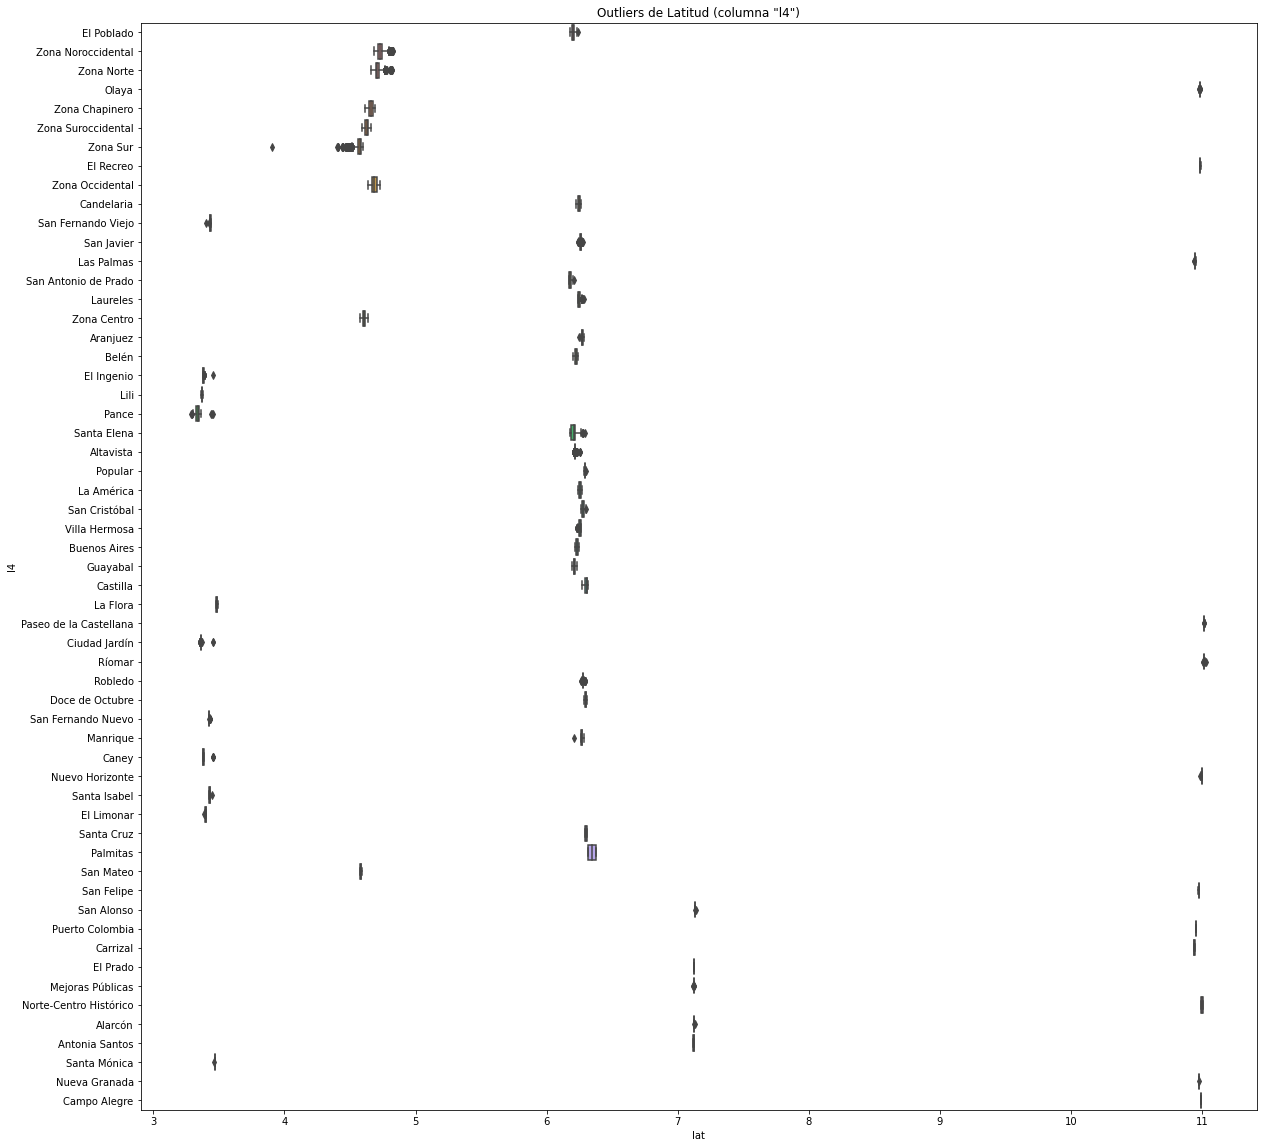

In [97]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = 'lat', y = 'l4', data = df_prom)
plt.title('Outliers de Latitud (columna "l4")')

Como no se observan bien, podemos verlos de mejor manera usando la columna *_"l2"_*

Text(0.5, 1.0, 'Outliers de Latitud (columna "l2")')

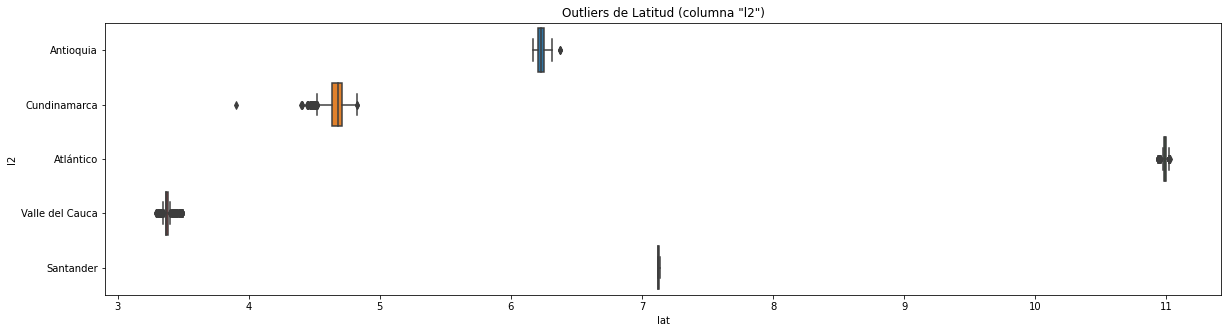

In [98]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = 'lat', y = 'l2', data = df_prom)
plt.title('Outliers de Latitud (columna "l2")')

Vemos como sí hay algunos outliers en las latitudes así que vamos a corregirlos por la media tomando como referencia la columna *_"l4"_* que es la más particular de cada lugar.

##### Corrección de outliers para las latitudes

In [99]:

lista = df_prom["l4"].unique().tolist()
for val_l4 in lista:
    # Media
    Mean = df_prom['lat'].mean()
    # Percentil 25%
    Q1 = np.percentile(df_prom[df_prom['l4']==val_l4]['lat'], 25, interpolation = 'midpoint')
    # Percentil 75%
    Q3 = np.percentile(df_prom[df_prom['l4']==val_l4]['lat'], 75,interpolation = 'midpoint')
    # Rango intercuartil
    IQR = Q3 - Q1
    # limite maximo
    maximo = Q3 + 1.5 * IQR
    # limite minimo
    minimo = Q1 - 1.5 * IQR

    # Corregimos los outliers                         
    df_prom["lat"] = df_prom[["l4", "lat"]].apply(
        lambda x: Mean
        if (x.l4 == val_l4 and x.lat >= maximo)
        else Mean
        if (x.l4 == val_l4 and x.lat <= minimo)
        else x.lat,
        axis=1
    )
print('Outliers listos !!!')

Outliers listos !!!


A continuación, se grafican cómo quedaron las latitudes para comparación de que mejoraron mucho.

Text(0.5, 1.0, 'Outliers de Latitud (columna "l4")')

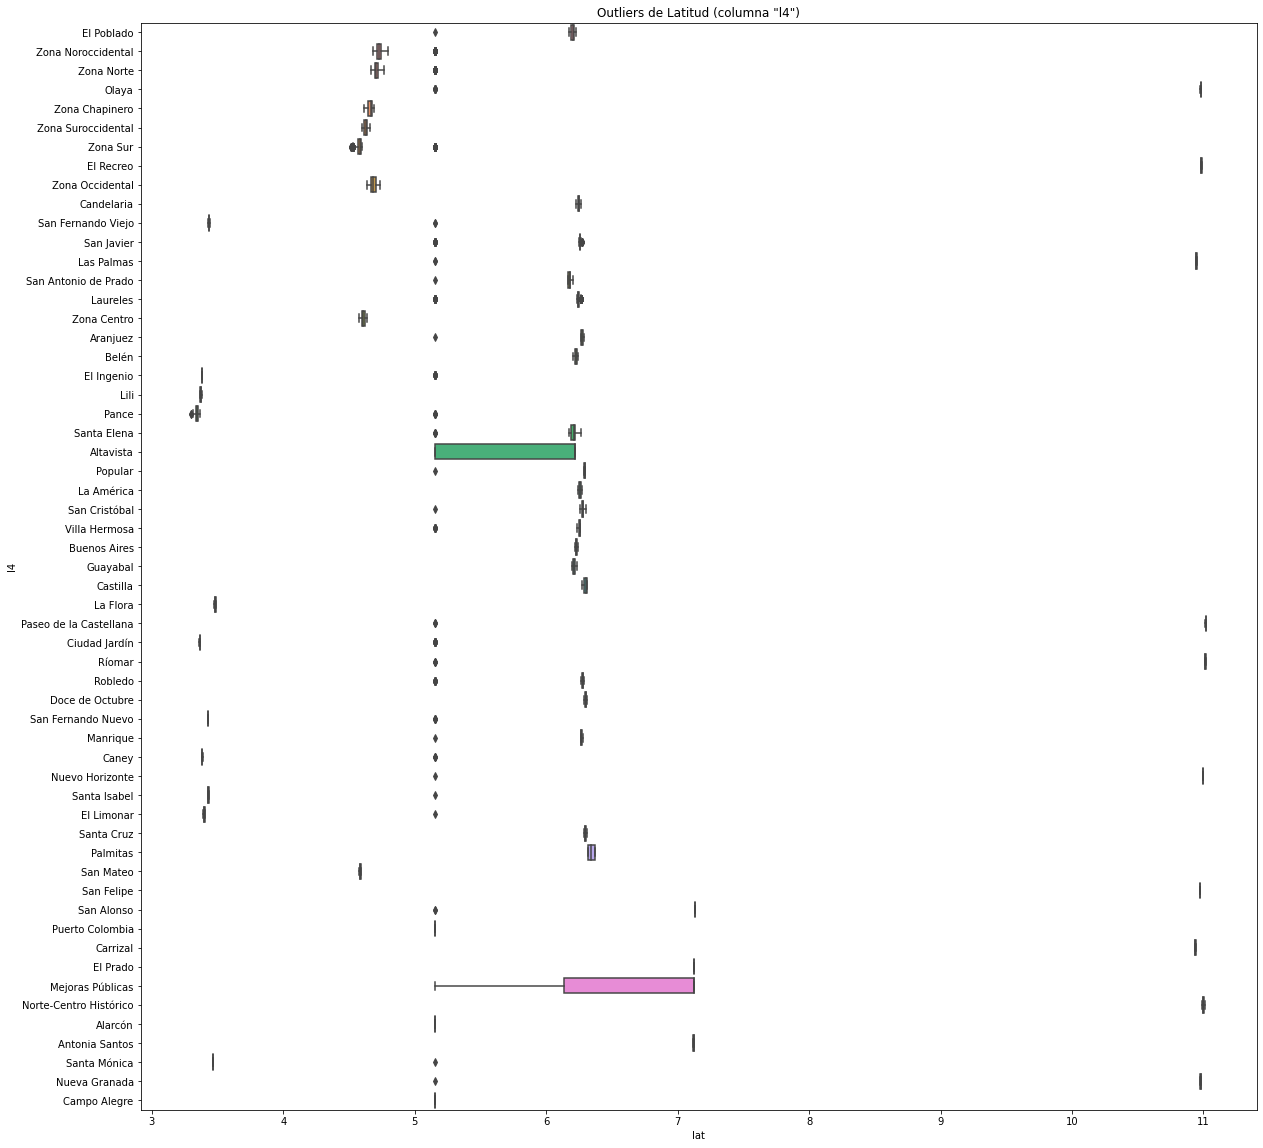

In [100]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = 'lat', y = 'l4', data = df_prom)
plt.title('Outliers de Latitud (columna "l4")')

Text(0.5, 1.0, 'Outliers de Latitud (columna "l2")')

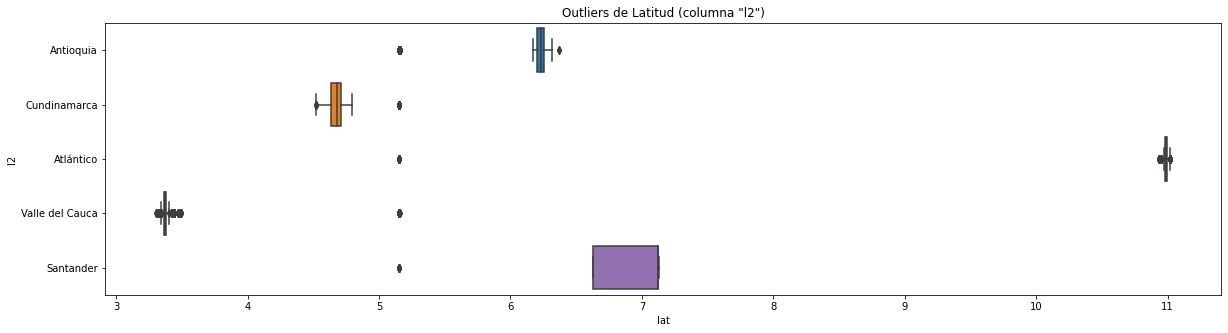

In [101]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = 'lat', y = 'l2', data = df_prom)
plt.title('Outliers de Latitud (columna "l2")')

##### Gráficamos los multiples outliers para las longitudes

Text(0.5, 1.0, 'Outliers de Longitud (columna "l4")')

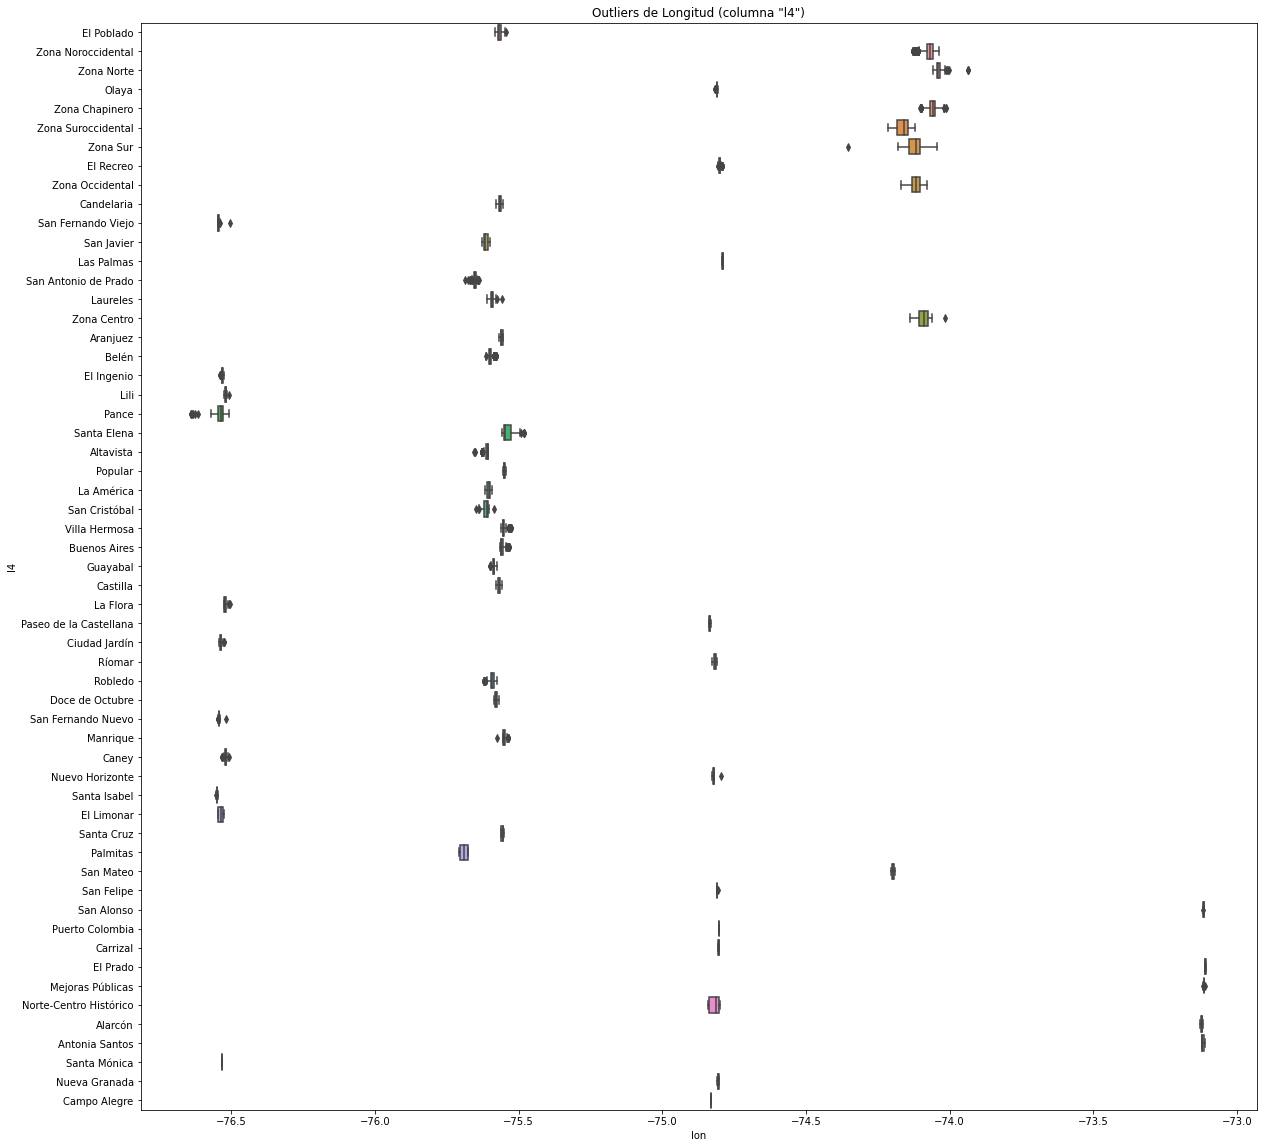

In [102]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = 'lon', y = 'l4', data = df_prom)
plt.title('Outliers de Longitud (columna "l4")')

Text(0.5, 1.0, 'Outliers de Longitud (columna "l2")')

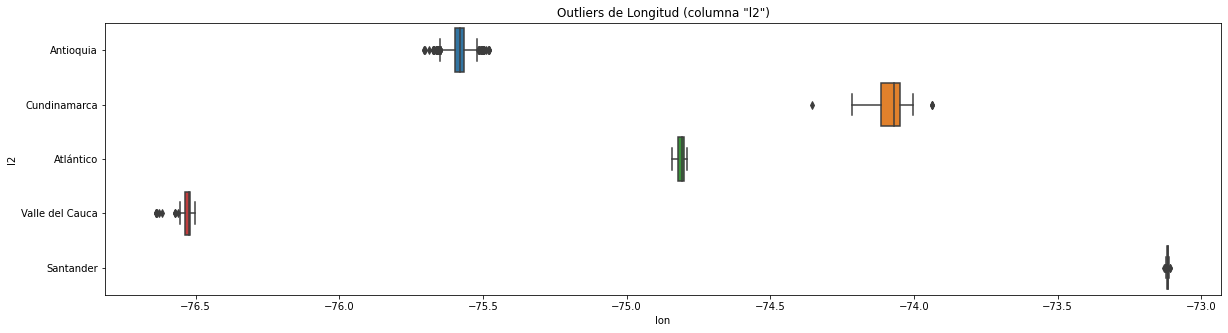

In [103]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = 'lon', y = 'l2', data = df_prom)
plt.title('Outliers de Longitud (columna "l2")')

Observamos que tambien hay outliers, procedemos a corregirlos

##### Corrección de outliers para las longitudes

In [104]:

lista = df_prom["l4"].unique().tolist()
for val_l4 in lista:
    # Media
    Mean = df_prom['lon'].mean()
    # Percentil 25%
    Q1 = np.percentile(df_prom[df_prom['l4']==val_l4]['lon'], 25, interpolation = 'midpoint')
    # Percentil 75%
    Q3 = np.percentile(df_prom[df_prom['l4']==val_l4]['lon'], 75,interpolation = 'midpoint')
    # Rango intercuartil
    IQR = Q3 - Q1
    # limite maximo
    maximo = Q3 + 1.5 * IQR
    # limite minimo
    minimo = Q1 - 1.5 * IQR

    # Corregimos los outliers                         
    df_prom["lon"] = df_prom[["l4", "lon"]].apply(
        lambda x: Mean
        if (x.l4 == val_l4 and x.lon >= maximo)
        else Mean
        if (x.l4 == val_l4 and x.lon <= minimo)
        else x.lon,
        axis=1
    )
print('Outliers listos !!!')

Outliers listos !!!


Graficamos las longitudes.

Text(0.5, 1.0, 'Outliers de Longitudes (columna "l4")')

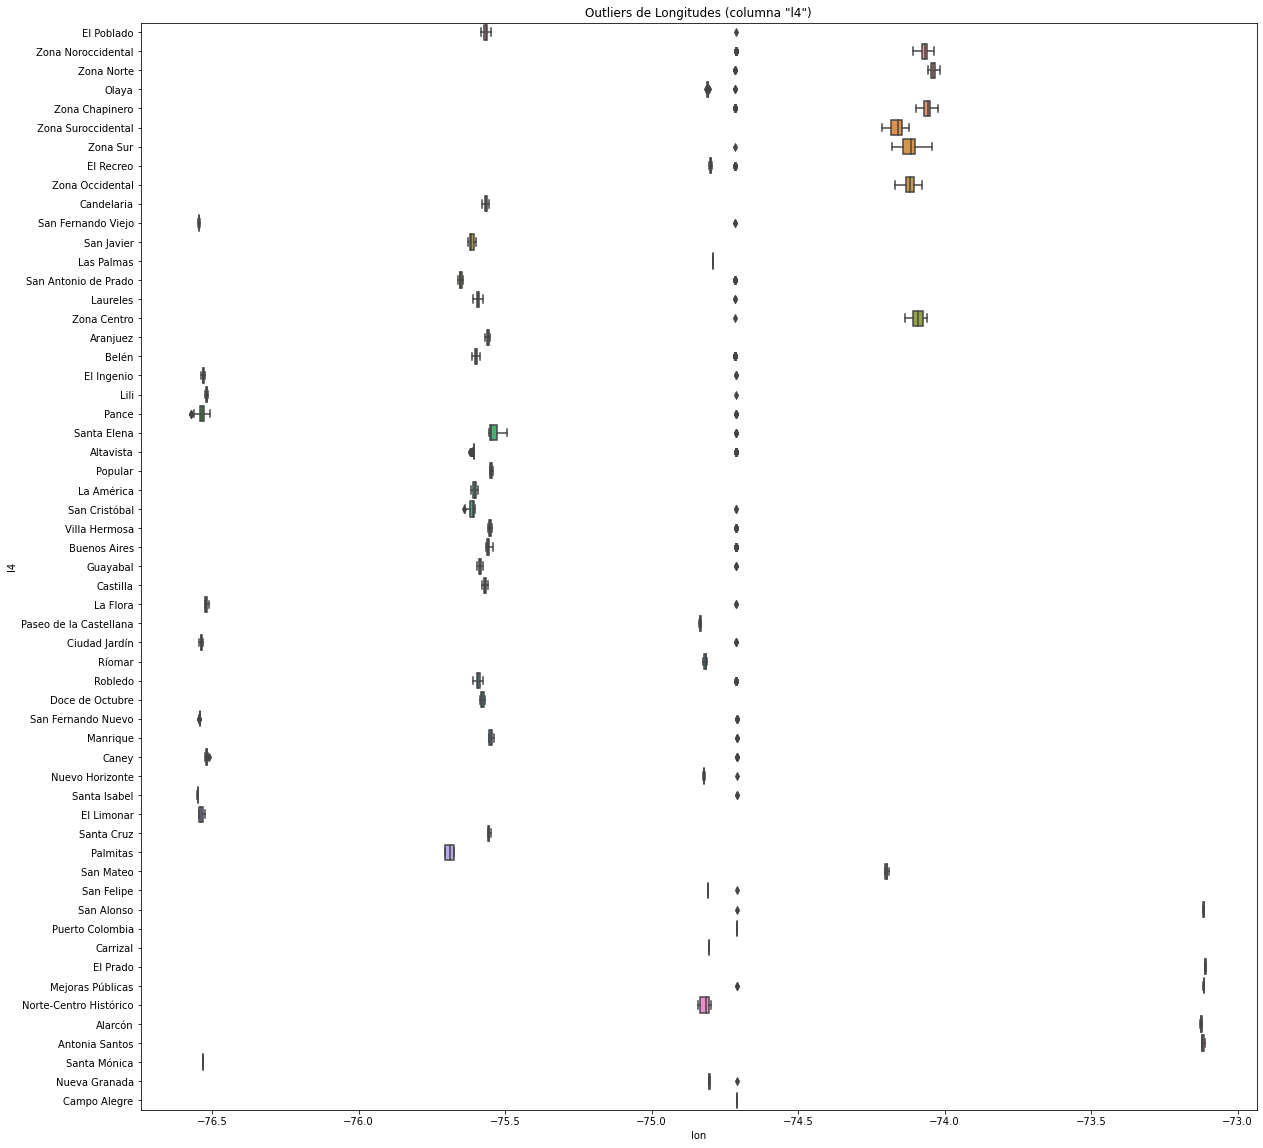

In [105]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = 'lon', y = 'l4', data = df_prom)
plt.title('Outliers de Longitudes (columna "l4")')

Text(0.5, 1.0, 'Outliers de Longitudes (columna "l2")')

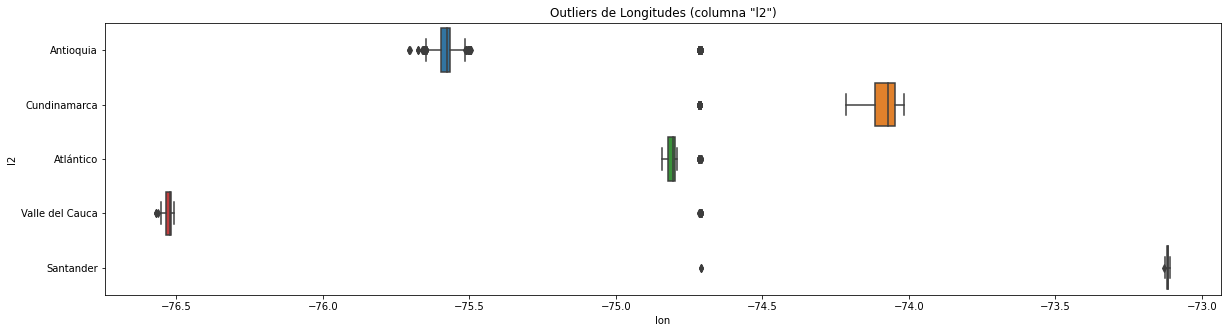

In [106]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = 'lon', y = 'l2', data = df_prom)
plt.title('Outliers de Longitudes (columna "l2")')

#### Usando columnas *_'l2','l3' y 'l4'_* para rescatar coordenadas

Las columnas *_'l2','l3' y 'l4'_* tienen información de la ubicación de las casas como: provincia, ciudad, barrio. Por esta razón, podemos usar esto a nuestro favor y promediar la ubicación de las zonas donde no tenemos coordenadas.

In [107]:
# Creamos un nuevo DataFrame con los valores NaN como cero
df_match = data[['l2','l3','l4','lat','lon']].fillna(0)
df_match.head()

,l2,l3,l4,lat,lon
0,Antioquia,Medellín,El Poblado,6.203000,-75.572000
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,4.722748,-74.073115
2,Cundinamarca,Bogotá D.C,Zona Norte,4.709000,-74.030000
3,Santander,Bucaramanga,0,0.000000,0.000000
4,Antioquia,Medellín,0,0.000000,0.000000


##### Imputacion usando: "l2", "l3" y "l4"

In [108]:
# Ubicamos las coordenadas faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
#     l4 - Nivel administrativo 4: usualmente barrio.

print('Iterando...')
for i in range(len(df_match)):
    lat = df_match.loc[i, "lat"]
    lon = df_match.loc[i, "lon"]
    if lat == 0 and lon == 0:
        for j in range(len(df_prom)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            l4 = df_match.loc[i, "l4"]
            coord = df_prom.loc[(df_prom['l2'] == l2) & (df_prom['l3'] == l3) & (df_prom['l4'] == l4)]
            df_match.loc[i, "lat"] = coord.lat.mean()
            df_match.loc[i, "lon"] = coord.lon.mean()
            break
print('Listo !!!')

Iterando...
Listo !!!


In [109]:
df_match.isnull().sum()

l2         0
l3         0
l4         0
lat    47023
lon    47023
dtype: int64

Si comparamos los valores faltantes podemos observar una mejora de los valores faltantes:

* lat(anterior): 49498 - lat(actual): 47023 
* lon(anterior): 49498 - lon(actual): 47023

Repetimos el procedimiento, pero ahora solo limitandonos a las columnas *_l2_ y l3*.

##### Imputacion usando: "l2" y "l3"

In [110]:
# Ubicamos las coordenadas faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.

df_match = df_match.fillna(0)

print('Iterando...')
for i in range(len(df_match)):
    lat = df_match.loc[i, "lat"]
    lon = df_match.loc[i, "lon"]
    if lat == 0 and lon == 0:
        for j in range(len(df_prom)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            coord = df_prom.loc[(df_prom['l2'] == l2) & (df_prom['l3'] == l3)]
            df_match.loc[i, "lat"] = coord.lat.mean()
            df_match.loc[i, "lon"] = coord.lon.mean()
            break
print('Listo !!!')

Iterando...
Listo !!!


In [111]:
df_match.isnull().sum()

l2         0
l3         0
l4         0
lat    10518
lon    10518
dtype: int64

Volviendo a comparar los valores faltantes podemos observar una mejora aun mayor de los valores faltantes:

* lat(anterior): 47023 - lat(actual): 10518
* lon(anterior): 47023 - lon(actual): 10518

En resumen, disminuimos los valores faltantes de un 25.05% a solo un 5.32%.

#### Ingestando en el DataFrame original (Borrado de 'l5' y 'l6')

In [112]:
# ELiminamos las columnas innecesarias del DataFrame auxiliar
df_match.drop(['l2', 'l3', 'l4'], axis=1, inplace=True)
# Renombramos las columnas del DataFrame auxiliar
df_match.rename(columns={'lat':'latitud', 'lon':'longitud'}, inplace=True)
# Combinamos con el DataFrame auxiliar
data = pd.concat([data, df_match], axis = 1)
# ELiminamos las columnas de 'l5', 'l6', 'lat' y 'lon' del DataFrame original
data.drop(['l5', 'l6', 'lat', 'lon'], axis=1, inplace=True)

#### Valores nulos actualizados

In [113]:
lista = data.isnull().sum().tolist()
nom = data.columns.tolist()
nom
dict_from_list = dict(zip(nom, lista))
for clave, valor in dict_from_list.items():
    print(f'{clave}: {valor}')

start_date: 0
end_date: 0
l2: 0
l3: 11032
l4: 152182
rooms: 170012
bedrooms: 157024
bathrooms: 41082
surface_total: 190575
surface_covered: 187747
price: 0
currency: 67
price_period: 161578
title: 1
description: 121
property_type: 0
latitud: 10518
longitud: 10518


#### Número de renglones y columnas actualizadas

In [54]:
data.shape

(197549, 18)

### f) Imputacion de valores en la columnas 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'

#### Obteniendo los valores de la columna: 'bathrooms'

In [115]:
df_med = data[['l2', 'l3', 'l4', 'bathrooms']].dropna()
df_med.head() #bathrooms: 41082

,l2,l3,l4,bathrooms
0,Antioquia,Medellín,El Poblado,4.0
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,2.0
2,Cundinamarca,Bogotá D.C,Zona Norte,2.0
6,Cundinamarca,Bogotá D.C,Zona Noroccidental,8.0
8,Atlántico,Barranquilla,Olaya,2.0


In [116]:
df_match = data[['l2', 'l3', 'l4', 'bathrooms']].fillna(0)
df_match.head() #bathrooms: 41082

,l2,l3,l4,bathrooms
0,Antioquia,Medellín,El Poblado,4.0
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,2.0
2,Cundinamarca,Bogotá D.C,Zona Norte,2.0
3,Santander,Bucaramanga,0,1.0
4,Antioquia,Medellín,0,2.0


In [117]:
# Ubicamos los faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
#     l4 - Nivel administrativo 4: usualmente barrio.

print('Iterando la etapa 1...')
for i in range(len(df_match)):
    bath = df_match.loc[i, "bathrooms"]
    if bath == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            l4 = df_match.loc[i, "l4"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3) & (df_med['l4'] == l4)]
            df_match.loc[i, "bathrooms"] = X.bathrooms.median()
            break
            
print('Etapa 1, lista !!! ')


# Ubicamos las coordenadas faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.

df_med = data[['l2', 'l3', 'l4', 'bathrooms']].dropna()
df_match = df_match.fillna(0)

print('Iterando la etapa 2...')
for i in range(len(df_match)):
    bath = df_match.loc[i, "bathrooms"]
    if bath == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3)]
            df_match.loc[i, "bathrooms"] = X.bathrooms.median()
            break
            
data["bathrooms"] = df_match["bathrooms"]
            
print('Etapa 2, Lista !!!')

Iterando la etapa 1...
Etapa 1, lista !!! 
Iterando la etapa 2...
Etapa 2, Lista !!!


In [118]:
data.isnull().sum() 

l2               0
l3               0
l4               0
bathrooms    23980
dtype: int64

In [156]:
# Reemplazaremos los valores faltantes con el valor 1 
data["bathrooms"].fillna(1, inplace = True)
data.isnull().sum() 

#### Obteniendo los valores de la columna: 'rooms'

In [123]:
df_med = data[['l2', 'l3', 'l4', 'rooms']].dropna()
df_med.head()

,l2,l3,l4,rooms
42,Atlántico,Barranquilla,El Recreo,3.0
50,Cundinamarca,Bogotá D.C,Zona Norte,4.0
106,Cundinamarca,Bogotá D.C,Zona Norte,2.0
109,Cundinamarca,Bogotá D.C,Zona Norte,2.0
126,Antioquia,Medellín,El Poblado,4.0


In [124]:
df_match = data[['l2', 'l3', 'l4', 'rooms']].fillna(0)
df_match.head()

,l2,l3,l4,rooms
0,Antioquia,Medellín,El Poblado,0.0
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,0.0
2,Cundinamarca,Bogotá D.C,Zona Norte,0.0
3,Santander,Bucaramanga,0,0.0
4,Antioquia,Medellín,0,0.0


In [125]:
# Ubicamos los faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
#     l4 - Nivel administrativo 4: usualmente barrio.
print('Iterando la etapa 1...')
for i in range(len(df_match)):
    Var = df_match.loc[i, "rooms"]
    if Var == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            l4 = df_match.loc[i, "l4"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3) & (df_med['l4'] == l4)]
            df_match.loc[i, "rooms"] = X.rooms.median()
            break
print('Etapa 1, lista !!! ')

# Ubicamos las coordenadas faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
df_med = data[['l2', 'l3', 'l4', 'rooms']].dropna()
df_match = df_match.fillna(0)

print('Iterando la etapa 2...')
for i in range(len(df_match)):
    Var = df_match.loc[i, "rooms"]
    if Var == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3)]
            df_match.loc[i, "rooms"] = X.rooms.median()
            break
            
data["rooms"] = df_match["rooms"]

print('Etapa 2, Lista !!!')

Iterando la etapa 1...
Etapa 1, lista !!! 
Iterando la etapa 2...
Etapa 2, Lista !!!


In [127]:
data.isnull().sum() 

start_date              0
end_date                0
l2                      0
l3                  11032
l4                 152182
rooms               71340
bedrooms           157024
bathrooms           23980
surface_total      190575
surface_covered    187747
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
latitud             10518
longitud            10518
dtype: int64

In [160]:
# Reemplazaremos los valores faltantes con el valor 1 
data["rooms"].fillna(1, inplace = True)
data.isnull().sum() 

start_date              0
end_date                0
l2                      0
l3                  11032
l4                 152182
rooms                   0
bedrooms            66224
bathrooms               0
surface_total       80632
surface_covered     80383
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
latitud             10518
longitud            10518
dtype: int64

#### Obteniendo los valores de la columna: 'bedrooms'

In [128]:
# DataFrames auxiliares
df_med = data[['l2', 'l3', 'l4', 'bedrooms']].dropna()
df_match = data[['l2', 'l3', 'l4', 'bedrooms']].fillna(0)
df_match.head()

,l2,l3,l4,bedrooms
0,Antioquia,Medellín,El Poblado,4.0
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,3.0
2,Cundinamarca,Bogotá D.C,Zona Norte,0.0
3,Santander,Bucaramanga,0,0.0
4,Antioquia,Medellín,0,0.0


In [129]:
# Ubicamos los faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
#     l4 - Nivel administrativo 4: usualmente barrio.
print('Iterando la etapa 1...')
for i in range(len(df_match)):
    Var = df_match.loc[i, "bedrooms"]
    if Var == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            l4 = df_match.loc[i, "l4"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3) & (df_med['l4'] == l4)]
            df_match.loc[i, "bedrooms"] = X.bedrooms.median()
            break
print('Etapa 1, lista !!! ')

# Ubicamos las coordenadas faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
df_med = data[['l2', 'l3', 'l4', 'bedrooms']].dropna()
df_match = df_match.fillna(0)

print('Iterando la etapa 2...')
for i in range(len(df_match)):
    Var = df_match.loc[i, "bedrooms"]
    if Var == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3)]
            df_match.loc[i, "bedrooms"] = X.bedrooms.median()
            break
            
data["bedrooms"] = df_match["bedrooms"]

print('Etapa 2, Lista !!!')

Iterando la etapa 1...
Etapa 1, lista !!! 
Iterando la etapa 2...
Etapa 2, Lista !!!


In [131]:
data.isnull().sum() 

start_date              0
end_date                0
l2                      0
l3                  11032
l4                 152182
rooms               71340
bedrooms            66224
bathrooms           23980
surface_total      190575
surface_covered    187747
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
latitud             10518
longitud            10518
dtype: int64

In [163]:
# Reemplazaremos los valores faltantes con el valor 1 
data["bedrooms"].fillna(1, inplace = True)
data.isnull().sum() 

start_date              0
end_date                0
l2                      0
l3                  11032
l4                 152182
rooms                   0
bedrooms                0
bathrooms               0
surface_total       80632
surface_covered     80383
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
latitud             10518
longitud            10518
dtype: int64

#### Obteniendo los valores de la columna: 'surface_total'

In [134]:
# DataFrames auxiliares
df_med = data[['l2', 'l3', 'l4', 'surface_total']].dropna()
df_match = data[['l2', 'l3', 'l4', 'surface_total']].fillna(0)
df_match.head()

,l2,l3,l4,surface_total
0,Antioquia,Medellín,El Poblado,0.0
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,0.0
2,Cundinamarca,Bogotá D.C,Zona Norte,0.0
3,Santander,Bucaramanga,0,0.0
4,Antioquia,Medellín,0,0.0


In [135]:
# Ubicamos los faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
#     l4 - Nivel administrativo 4: usualmente barrio.
print('Iterando la etapa 1...')
for i in range(len(df_match)):
    Var = df_match.loc[i, "surface_total"]
    if Var == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            l4 = df_match.loc[i, "l4"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3) & (df_med['l4'] == l4)]
            df_match.loc[i, "surface_total"] = X.surface_total.median()
            break
print('Etapa 1, lista !!! ')

# Ubicamos las coordenadas faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
df_med = data[['l2', 'l3', 'l4', 'surface_total']].dropna()
df_match = df_match.fillna(0)

print('Iterando la etapa 2...')
for i in range(len(df_match)):
    Var = df_match.loc[i, "surface_total"]
    if Var == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3)]
            df_match.loc[i, "surface_total"] = X.surface_total.median()
            break
            
data["surface_total"] = df_match["surface_total"]

print('Etapa 2, Lista !!!')

Iterando la etapa 1...
Etapa 1, lista !!! 
Iterando la etapa 2...
Etapa 2, Lista !!!


In [137]:
data.isnull().sum() 

start_date              0
end_date                0
l2                      0
l3                  11032
l4                 152182
rooms               71340
bedrooms            66224
bathrooms           23980
surface_total       80632
surface_covered    187747
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
latitud             10518
longitud            10518
dtype: int64

In [168]:
# Reemplazaremos los valores faltantes con el promedio
surface_total_mean = data["surface_total"].mean()
data["surface_total"].fillna(surface_total_mean, inplace = True)
data.isnull().sum() 

start_date              0
end_date                0
l2                      0
l3                  11032
l4                 152182
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered     80383
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
latitud             10518
longitud            10518
dtype: int64

#### Obteniendo los valores de la columna: 'surface_covered'

In [140]:
# DataFrames auxiliares
df_med = data[['l2', 'l3', 'l4', 'surface_covered']].dropna()
df_match = data[['l2', 'l3', 'l4', 'surface_covered']].fillna(0)
df_match.head()

,l2,l3,l4,surface_covered
0,Antioquia,Medellín,El Poblado,0.0
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,0.0
2,Cundinamarca,Bogotá D.C,Zona Norte,0.0
3,Santander,Bucaramanga,0,0.0
4,Antioquia,Medellín,0,0.0


In [141]:
# Ubicamos los faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
#     l4 - Nivel administrativo 4: usualmente barrio.
print('Iterando la etapa 1...')
for i in range(len(df_match)):
    Var = df_match.loc[i, "surface_covered"]
    if Var == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            l4 = df_match.loc[i, "l4"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3) & (df_med['l4'] == l4)]
            df_match.loc[i, "surface_covered"] = X.surface_covered.median()
            break
print('Etapa 1, lista !!! ')

# Ubicamos las coordenadas faltantes en funcion del: 
#     l2 - Nivel administrativo 2, usualmente provincia.
#     l3 - Nivel administrativo 3: usualmente ciudad.
df_med = data[['l2', 'l3', 'l4', 'surface_covered']].dropna()
df_match = df_match.fillna(0)

print('Iterando la etapa 2...')
for i in range(len(df_match)):
    Var = df_match.loc[i, "surface_covered"]
    if Var == 0:
        for j in range(len(df_med)):
            l2 = df_match.loc[i, "l2"]
            l3 = df_match.loc[i, "l3"]
            X = df_med.loc[(df_med['l2'] == l2) & (df_med['l3'] == l3)]
            df_match.loc[i, "surface_covered"] = X.surface_covered.median()
            break
            
data["surface_covered"] = df_match["surface_covered"]

print('Etapa 2, Lista !!!')

Iterando la etapa 1...
Etapa 1, lista !!! 
Iterando la etapa 2...
Etapa 2, Lista !!!


In [142]:
data.isnull().sum() # 187747

start_date              0
end_date                0
l2                      0
l3                  11032
l4                 152182
rooms               71340
bedrooms            66224
bathrooms           23980
surface_total       80632
surface_covered     80383
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
latitud             10518
longitud            10518
dtype: int64

In [170]:
# Reemplazaremos los valores faltantes con el promedio
surface_covered_mean = data["surface_covered"].mean()
data["surface_covered"].fillna(surface_covered_mean, inplace = True)
data.isnull().sum() 

start_date              0
end_date                0
l2                      0
l3                  11032
l4                 152182
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
latitud             10518
longitud            10518
dtype: int64

### g) Columnas 'currency', 'price_period', 'title' ,'description'

Las columnas 'currency' y 'price_period', no tenia información relevante. Las columnas 'title' y 'description', aunque si tenia información relevante, no se encontró la forma de extraer dicha información usando procesamiento de lenguaje natural. Por tales razones se eliminaran las tres columnas.

In [172]:
# Eliminamos la columna 'geometry':
data.drop(['currency', 'price_period', 'title' ,'description'], axis=1, inplace=True)
data.head()

,start_date,end_date,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,latitud,longitud
0,1607925600,1609394400,Antioquia,Medellín,El Poblado,3.0,4.0,4.0,157.0,157.0,1,Casa,6.203000,-75.572000
1,1600232400,1620968400,Cundinamarca,Bogotá D.C,Zona Noroccidental,3.0,3.0,2.0,137.0,110.0,0,Apartamento,4.722748,-74.073115
2,1597813200,1597899600,Cundinamarca,Bogotá D.C,Zona Norte,3.0,3.0,2.0,102.0,105.0,0,Casa,4.709000,-74.030000
3,1606111200,1606716000,Santander,Bucaramanga,NaN,3.0,3.0,1.0,100.0,84.5,1,Otro,6.632215,-73.208634
4,1601960400,1602046800,Antioquia,Medellín,NaN,3.0,3.0,2.0,121.0,122.0,0,Apartamento,6.217816,-75.564349


### h) Eliminación de valores nulos

Eliminarémos los registros cuyos valores nulos se encuentren en las columnas de *_'latitud' y 'longitud'_*

In [181]:
data = data[data['latitud'].notna()]
data

,start_date,end_date,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,latitud,longitud
0,1607925600,1609394400,Antioquia,Medellín,El Poblado,3.0,4.0,4.0,157.0,157.0,1,Casa,6.203000,-75.572000
1,1600232400,1620968400,Cundinamarca,Bogotá D.C,Zona Noroccidental,3.0,3.0,2.0,137.0,110.0,0,Apartamento,4.722748,-74.073115
2,1597813200,1597899600,Cundinamarca,Bogotá D.C,Zona Norte,3.0,3.0,2.0,102.0,105.0,0,Casa,4.709000,-74.030000
3,1606111200,1606716000,Santander,Bucaramanga,NaN,3.0,3.0,1.0,100.0,84.5,1,Otro,6.632215,-73.208634
4,1601960400,1602046800,Antioquia,Medellín,NaN,3.0,3.0,2.0,121.0,122.0,0,Apartamento,6.217816,-75.564349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,1603778400,1609394400,Cundinamarca,Bogotá D.C,Zona Suroccidental,3.0,3.0,2.0,69.0,68.0,0,Apartamento,4.649682,-74.161950
197545,1606456800,1607493600,Cundinamarca,Bogotá D.C,Zona Chapinero,3.0,3.0,1.0,133.5,17.0,0,Oficina,4.668000,-74.055000
197546,1603864800,1609567200,Valle del Cauca,Cali,NaN,3.0,3.0,1.0,126.5,120.0,0,Otro,3.413000,-76.541000
197547,1597381200,1597381200,Cundinamarca,Bogotá D.C,Zona Occidental,3.0,3.0,2.0,109.0,116.5,0,Casa,4.674874,-74.147077


In [182]:
data.isnull().sum()

start_date              0
end_date                0
l2                      0
l3                  10708
l4                 141664
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
property_type           0
latitud                 0
longitud                0
dtype: int64

### i) Reemplazamos los valores faltantes de 'l3' y 'l4'

In [183]:
data["l3"].fillna('l3_UnKnown', inplace = True)
data.isnull().sum() 

D:\JOSUE\TEMP\ipykernel_10068\253781045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["l3"].fillna('l3_UnKnown', inplace = True)


start_date              0
end_date                0
l2                      0
l3                      0
l4                 141664
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
property_type           0
latitud                 0
longitud                0
dtype: int64

In [184]:
data["l4"].fillna('l4_UnKnown', inplace = True)
data.isnull().sum() 

D:\JOSUE\TEMP\ipykernel_10068\4197252908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["l4"].fillna('l4_UnKnown', inplace = True)


start_date         0
end_date           0
l2                 0
l3                 0
l4                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
latitud            0
longitud           0
dtype: int64

### j) Guardamos el DataFrame en un *.csv

In [185]:
data.to_csv('dataset_train.csv')
print('Dataset guardado !!!')

Dataset guardado !!!


### k) Analisis exploratorio de los datos usando un Mapa de Calor.

Creamos un histograma de cada categoría para realizar una análisis rápido que nos permita sacar conclusiones a simple vista sobre el dataset.

<AxesSubplot:>

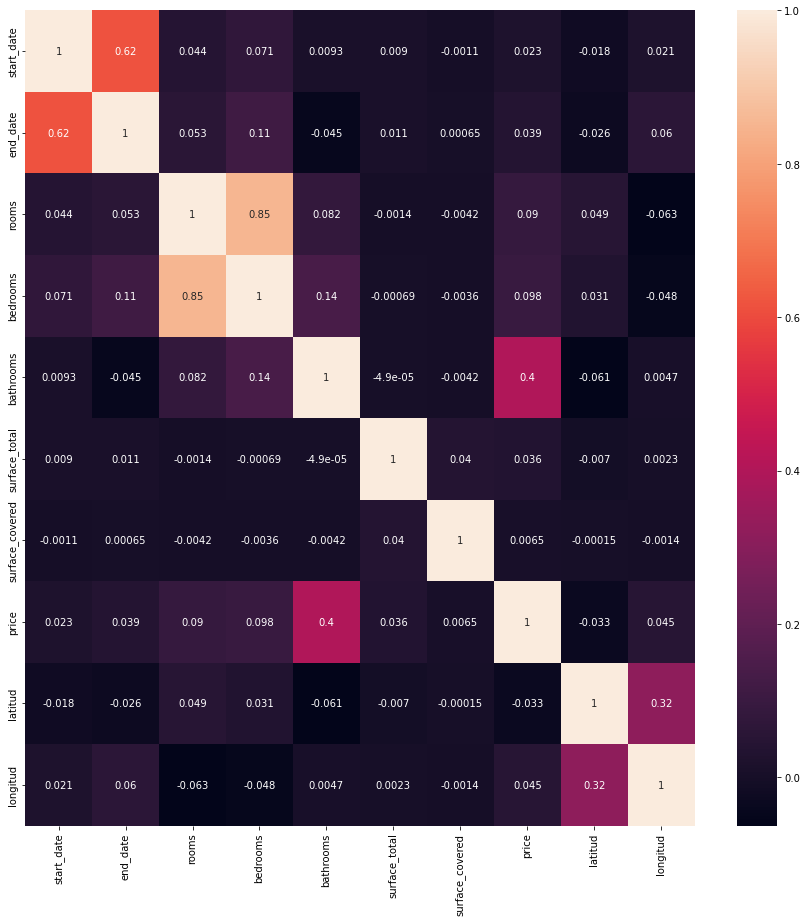

In [188]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlations, annot = True)

**Conclusiones del análisis exploratorio.**

1) **start_date y end_date** estan fuertemente correlacionadas entre sí.

2) **rooms y bedrooms** estan fuertemente correlacionadas entre sí.

3) **bathrooms y price** estan medianamente correlacionadas entre sí.

4) **bathrooms y price** estan medianamente correlacionadas entre sí.

5) **surface_total y surface_covered** no estan correlacionadas con nada.

6) **latitud y longitud** estan medianamente correlacionadas entre sí.

## 3) Preprocesamiento de datos.

In [189]:
# Visualizamos el DataFrame:
data.head(3)

,start_date,end_date,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,latitud,longitud
0,1607925600,1609394400,Antioquia,Medellín,El Poblado,3.0,4.0,4.0,157.0,157.0,1,Casa,6.203000,-75.572000
1,1600232400,1620968400,Cundinamarca,Bogotá D.C,Zona Noroccidental,3.0,3.0,2.0,137.0,110.0,0,Apartamento,4.722748,-74.073115
2,1597813200,1597899600,Cundinamarca,Bogotá D.C,Zona Norte,3.0,3.0,2.0,102.0,105.0,0,Casa,4.709000,-74.030000


### a) Codificación de variables categóricas.

La variable categórica, a diferencia de las variables cardinales o continuas (que permiten cálculos numéricos), clasifica a los individuos o casos. Normalmente toman valores representados por números enteros, como el uno o el cero, pero estos son solo eso, representaciones.

In [215]:
# Variables categoricas
X_cat = data[['l2', 'l3', 'l4', 'property_type']]
X_cat

,l2,l3,l4,property_type
0,Antioquia,Medellín,El Poblado,Casa
1,Cundinamarca,Bogotá D.C,Zona Noroccidental,Apartamento
2,Cundinamarca,Bogotá D.C,Zona Norte,Casa
3,Santander,Bucaramanga,l4_UnKnown,Otro
4,Antioquia,Medellín,l4_UnKnown,Apartamento
...,...,...,...,...
197544,Cundinamarca,Bogotá D.C,Zona Suroccidental,Apartamento
197545,Cundinamarca,Bogotá D.C,Zona Chapinero,Oficina
197546,Valle del Cauca,Cali,l4_UnKnown,Otro
197547,Cundinamarca,Bogotá D.C,Zona Occidental,Casa


Tenemos que transformar estas variables categoricas a variables numéricas para poder aplicarlas a un modelo de Machine Learning. Para realizar esto, utilizaremos la libreria de **sklearn** que nos da acceso a una función llamada **OneHotEncoder** que codificará los datos.

In [216]:
# Importamos la función OneHotEncoder:
from sklearn.preprocessing import OneHotEncoder
# Creamos un objeto de OneHotEncoder:
onehotencoder = OneHotEncoder()
# Transformamos las variables categoricas:
X_cat = onehotencoder.fit_transform(X_cat).toarray()
# Checamos su tamaño:
X_cat.shape

(187031, 380)

Observamos que esta transformación siempre incrementa nuesto número de columnas, en este caso de 4 a 380.

Pasamos la variable **X_cat** a DataFrame:

In [217]:
# Creamos el dataframe
X_cat = pd.DataFrame(data = X_cat, index = data.index)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,370,371,372,373,374,375,376,377,378,379
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### b) Variables numéricas a utilizar en el modelo.

Aquí creamos un DataFrame que contenga solo variables numéricas y que no incluyan a nuestra columna **price**, ya que esta es la columna objetivo, o sea, es la columna que tratamos de predecir. 

In [218]:
# Notemos que hemos elminado la columna objetivo: 'price'.
X_numerical = data[['start_date', 'end_date', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'latitud', 'longitud']]
X_numerical

,start_date,end_date,rooms,bedrooms,bathrooms,surface_total,surface_covered,latitud,longitud
0,1607925600,1609394400,3.0,4.0,4.0,157.0,157.0,6.203000,-75.572000
1,1600232400,1620968400,3.0,3.0,2.0,137.0,110.0,4.722748,-74.073115
2,1597813200,1597899600,3.0,3.0,2.0,102.0,105.0,4.709000,-74.030000
3,1606111200,1606716000,3.0,3.0,1.0,100.0,84.5,6.632215,-73.208634
4,1601960400,1602046800,3.0,3.0,2.0,121.0,122.0,6.217816,-75.564349
...,...,...,...,...,...,...,...,...,...
197544,1603778400,1609394400,3.0,3.0,2.0,69.0,68.0,4.649682,-74.161950
197545,1606456800,1607493600,3.0,3.0,1.0,133.5,17.0,4.668000,-74.055000
197546,1603864800,1609567200,3.0,3.0,1.0,126.5,120.0,3.413000,-76.541000
197547,1597381200,1597381200,3.0,3.0,2.0,109.0,116.5,4.674874,-74.147077


### c) Escalado de datos.

Como tenémos dos DataFrame, **X_cat** y **X_numerical**. Tenemos que unirlos para poder trabajarlos como uno solo y asi poder escalarlo.

In [219]:
# Concatenamos ambos DataFrame para tener uno solo relacionado:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,379,start_date,end_date,rooms,bedrooms,bathrooms,surface_total,surface_covered,latitud,longitud
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1607925600,1609394400,3.0,4.0,4.0,157.0,157.0,6.203000,-75.572000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1600232400,1620968400,3.0,3.0,2.0,137.0,110.0,4.722748,-74.073115
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1597813200,1597899600,3.0,3.0,2.0,102.0,105.0,4.709000,-74.030000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1606111200,1606716000,3.0,3.0,1.0,100.0,84.5,6.632215,-73.208634
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1601960400,1602046800,3.0,3.0,2.0,121.0,122.0,6.217816,-75.564349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1603778400,1609394400,3.0,3.0,2.0,69.0,68.0,4.649682,-74.161950
197545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1606456800,1607493600,3.0,3.0,1.0,133.5,17.0,4.668000,-74.055000
197546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1603864800,1609567200,3.0,3.0,1.0,126.5,120.0,3.413000,-76.541000
197547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1597381200,1597381200,3.0,3.0,2.0,109.0,116.5,4.674874,-74.147077


El escalado va a transformar los valores de las variables de forma que estén confinados en un rango $[a, b]$, típicamente $[0, 1]$ o $[-1, 1]$. Esto ayuda a que los modelos de **Machine Learning** usen todos los datos de manera uniforme y no haya sesgos hacia una variable debido a su tamaño con respecto a otra.

Para realizar esto, utilizaremos la libreria de **sklearn** que nos da acceso a una función llamada **MinMaxScaler** que escalará los datos.

In [220]:
#############################################
# El minimo siempre sera: 0 y el maximo : 1 #
#############################################

# Importamos la función MinMaxScaler:
from sklearn.preprocessing import MinMaxScaler
# Creamos un objeto de MinMaxScaler:
scaler = MinMaxScaler()
# Transformamos las variables escaladas:
X = scaler.fit_transform(X_all)
# Checamos el array:
X

D:\JOSUE\Anaconda_2022\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\JOSUE\Anaconda_2022\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.48275991e-05, 5.80147155e-01, 8.45076429e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.13218481e-05, 5.58122118e-01, 8.73782118e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.98850661e-05, 5.57917551e-01, 8.74607821e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.41954121e-05, 5.38634039e-01, 8.26518763e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.31896647e-05, 5.57409786e-01, 8.72365640e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.78735712e-05, 6.50570564e-01, 8.59805755e-01]])

### d) Vector de predicciones (objetivo)

In [221]:
# Variable dependiente
y = data['price']
y

0         1
1         0
2         0
3         1
4         0
         ..
197544    0
197545    0
197546    0
197547    0
197548    0
Name: price, Length: 187031, dtype: int64

In [222]:
len(X), len(y)

(187031, 187031)

## 4) Procesamiento de datos

### a) Set de entrenamiento y de prueba.

Lo primero que haremos será dividir el conjunto de entrenamiento en un 75% para crear el modelo y el otro 25% para probar el modelo, verificamos los resultados y asi asegurar que no tiene **Overfitting**.

Para realizar esto, utilizaremos la libreria de **sklearn** que nos da acceso a una función llamada **train_test_split** que nos dará los datos de entrenamiento (X_train, y_train) y prueba (X_test, y_test).

In [223]:
# Importamos la función train_test_split:
from sklearn.model_selection import train_test_split
# Creamos los datos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # 25% para entrenamiento

print('Sets de entrenamiento y prueba listos !!!')

Sets de entrenamiento y prueba listos !!!


In [224]:
# Tamaño del modelo de entrenamiento:
X_train.shape

(140273, 389)

In [225]:
# Tamaño del modelo de prueba:
X_test.shape

(46758, 389)

## 5) Regresión Logística.

Utilizaremos la libreria de **sklearn.linear_model** que nos da acceso a una función llamada **LogisticRegression** para usar la regresión logística y **sklearn.metrics** que nos da acceso a una función llamada **accuracy_score** para obtener la tasa de acierto.

In [226]:
# -- Regresión Logística -- #

# Importamos la función LogisticRegression y accuracy_score:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creamos un objeto de LogisticRegression:
model_lr = LogisticRegression()

# Cremos el modelo para predecir uasando los datos de entrenamiento:
model_lr.fit(X_train, y_train)

# Hacemos la prediccion, para ver si el modelo se comporta bien:
y_pred = model_lr.predict(X_test)

# Vector de predicción:
y_pred

print('\nEl modelo ha sido entrenado!!!')


El modelo ha sido entrenado!!!


D:\JOSUE\Anaconda_2022\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### a) Tasa de acierto del modelo.

La tasa de acierto se calcula de la siguiente forma:

In [227]:
print(f'Tasa de acierto: {round(100*accuracy_score(y_pred, y_test),2)} %')

Tasa de acierto: 83.88 %


### b) Matriz de confusión.

Utilizaremos la libreria de **sklearn.metrics** que nos da acceso a una función llamada **confusion_matrix** para visualizar la matriz de confusión.

<AxesSubplot:>

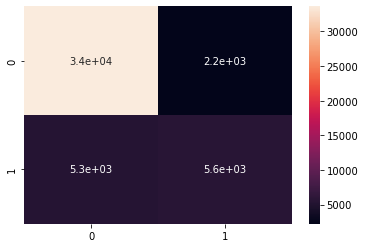

In [228]:
# Importamos la función confusion_matrix:
from sklearn.metrics import confusion_matrix
# Cremos la matriz de confusión uasando el vector de predicción (y_pred) y de prueba (y_test):
cm = confusion_matrix(y_test, y_pred)
# Visualizamos la matriz de confusión con un mapa de calor:
sns.heatmap(cm, annot = True)

**a) El modelo clasifica de forma correcta que:**

    34,000 verdaderos positivos (TP) y 2,200 falsos positivos (FP).

**b) El modelo clasifica de forma incorrecta que:**

    5,300 falsos negativos (FN) y 5,600 verdaderos negativos (TN)

### c) Reporte de clasificación.

Utilizaremos la libreria de **sklearn.metrics** que nos da acceso a una función llamada **classification_report** para obtener:

    * precision    
    * recall  
    * f1-score   
    * support

In [229]:
# Importamos la función classification_report:
from sklearn.metrics import classification_report

# Imprimimos las variables:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     35840
           1       0.72      0.51      0.60     10918

    accuracy                           0.84     46758
   macro avg       0.79      0.73      0.75     46758
weighted avg       0.83      0.84      0.83     46758



## 6) Bosques aleatorios.

Utilizaremos la libreria de **sklearn.ensemble** que nos da acceso a una función llamada **RandomForestClassifier** para usar la clasificación por bosques aleatorios.

In [230]:
# -- Bosques Aleatorios -- #

# Importamos la función RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier

# Creamos un objeto de RandomForestClassifier:
model_rf = RandomForestClassifier()

# Cremos el modelo para predecir uasando los datos de entrenamiento:
model_rf.fit(X_train, y_train)

# Hacemos la prediccion, para ver si el modelo se comporta bien:
y_pred = model_rf.predict(X_test)

# Vector de predicción:
print(y_pred)

print('El modelo ha sido entrenado!!!')

[1 0 0 ... 0 0 0]
El modelo ha sido entrenado!!!


### a) Tasa de acierto del modelo.

In [231]:
print(f'Tasa de acierto: {round(100*accuracy_score(y_pred, y_test),2)} %')

Tasa de acierto: 89.45 %


### b) Matriz de confusión.

<AxesSubplot:>

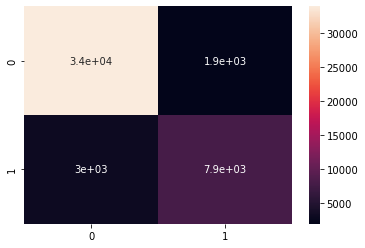

In [232]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

**a) El modelo clasifica de forma correcta que:**

    34,000 verdaderos positivos (TP) y 1,900 falsos positivos (FP).

**b) El modelo clasifica de forma incorrecta que:**

    3,000 falsos negativos (FN) y 7,900 verdaderos negativos (TN)

### c) Reporte de clasificación.

In [233]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     35840
           1       0.80      0.72      0.76     10918

    accuracy                           0.89     46758
   macro avg       0.86      0.84      0.85     46758
weighted avg       0.89      0.89      0.89     46758



## 7) Redes neuronales artificiales.

Utilizaremos la libreria de **tensorflow** para utilizar **keras** que nos permite crear *redes neuronales artificiales densas*.

In [238]:
# -- Redes Neuronales Artificiales -- #

# Importamos la libreria tensorflow:
import tensorflow as tf

# Creamos un modelo secuencuencial de capas profundas
model_rnn = tf.keras.models.Sequential()

# Añadimos una primera capa densa (de entrada):
# units: número de neuronas de la primera capa oculta 
# activation: funcion de activacion, para este ejemplo usaremos la funcion rectificadora lineal unitaria.
# input_shape: Número de columnas de nuestro dataset, X_all.
model_rnn.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (389, )))

# Añadimos una segunda capa densa (oculta):
model_rnn.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))

# Añadimos una tercera capa densa (oculta):
model_rnn.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))

# Añadimos una cuarta capa densa (de salida):
model_rnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Podemos ver la arquitectura de nuestra red neuronal:
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               195000    
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 696,501
Trainable params: 696,501
Non-trainable params: 0
_________________________________________________________________


Compilamos el modelo indicando el optimizador que se va a utilizar (optimizador de Adam) y la funcion de perdidas para medir el error

In [239]:
# Compilamos el modelo
model_rnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print('Compilado listo !!')

Compilado listo !!


In [240]:
# Entrenamos el modelo:
epochs_hist = model_rnn.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
2806/2806 [==============================] - 20s 6ms/step - loss: 0.3536 - accuracy: 0.8380
Epoch 2/100
2806/2806 [==============================] - 15s 5ms/step - loss: 0.3320 - accuracy: 0.8488
Epoch 3/100
2806/2806 [==============================] - 16s 6ms/step - loss: 0.3258 - accuracy: 0.8511
Epoch 4/100
2806/2806 [==============================] - 16s 6ms/step - loss: 0.3222 - accuracy: 0.8534
Epoch 5/100
2806/2806 [==============================] - 16s 6ms/step - loss: 0.3190 - accuracy: 0.8551
Epoch 6/100
2806/2806 [==============================] - 16s 6ms/step - loss: 0.3173 - accuracy: 0.8559
Epoch 7/100
2806/2806 [==============================] - 16s 6ms/step - loss: 0.3148 - accuracy: 0.8570
Epoch 8/100
2806/2806 [==============================] - 15s 6ms/step - loss: 0.3129 - accuracy: 0.8577
Epoch 9/100
2806/2806 [==============================] - 15s 5ms/step - loss: 0.3116 - accuracy: 0.8582
Epoch 10/100
2806/2806 [==============================] - 16s 6m

In [243]:
y_pred = model_rnn.predict(X_test)

1462/1462 [==============================] - 6s 2ms/step


In [244]:
y_pred = (y_pred > 0.5)

### a) Tasa de acierto del modelo.

In [245]:
print(f'Tasa de acierto: {round(100*accuracy_score(y_pred, y_test),2)} %')

Tasa de acierto: 85.17 %


### b) Matriz de confusión.

<AxesSubplot:>

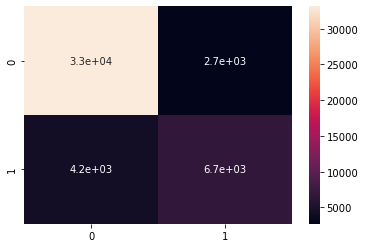

In [246]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

**a) El modelo clasifica de forma correcta que:**

    33,000 verdaderos positivos (TP) y 2,700 falsos positivos (FP).

**b) El modelo clasifica de forma incorrecta que:**

    4,200 falsos negativos (FN) y 6,700 verdaderos negativos (TN)

### c) Reporte de clasificación.

In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     35840
           1       0.71      0.61      0.66     10918

    accuracy                           0.85     46758
   macro avg       0.80      0.77      0.78     46758
weighted avg       0.85      0.85      0.85     46758



## 8) Resumen de los 3 modelos

1) LogisticRegression:

    * Accuracy: 83.88 %
    * Recall(0): 0.94
    * Recall(1): 0.51


2) RandomForestClassifier:

    * Accuracy: 89.45 %
    * Recall(0): 0.95
    * Recall(1): 0.72


3) ArtificialNeuralNetwork:

    * Accuracy: 85.17 %
    * Recall(0): 0.92
    * Recall(1): 0.61


Por lo tanto, utilizaremos el modelo de RandomForestClassifier para clasificar el dataset del test.

## 9) Archivo pickle

### a) Entrenamiento con todo el dataset: properties_colombia_train.csv

In [253]:
X_train_csv = X 
y_train_csv = y

print('Set de entrenamiento listo !!!')

Set de entrenamiento listo !!!


### b) Modelo: RandomForestClassifier

In [254]:
# -- Bosques Aleatorios -- #

# Importamos la función RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier

# Creamos un objeto de RandomForestClassifier:
model_RFC = RandomForestClassifier()

# Creamos el modelo para predecir uasando los datos de entrenamiento:
model_RFC.fit(X_train_csv, y_train_csv)

print('El modelo ha sido entrenado !!!')

El modelo ha sido entrenado !!!


### c) Creacion del archivo *.sav

In [256]:
import pickle

pickle.dump(model_RFC, open('model_random_forest_classifier.sav', 'wb'))

print('Modelo guardado !!!')

Modelo guardado !!!
